# HOUSING PRICE PREDICTION AND MARKET SEGMENTATION IN KUALA LUMPURE

### IMPORTING DEPENDACIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import re

### DATA CLEANING & PREPROCESSING

1. loading dataset


In [2]:
#load the dataset
df = pd.read_csv("housing_data.csv")

#display the first few rows
df.head(20)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
6,"Seputeh, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,950,000",4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished
9,"Sri Petaling, Kuala Lumpur","RM 385,000",3,2.0,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished


#### Check structure and missing value

In [3]:
#dataset info
df.info()

#summary of data
df.describe()

#checking null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

#### Checking & Extracting Size in Square Feet

The 'Size' column has values like "Built-up : 1,335 sq. ft.". We extract just the numeric part (e.g., 1335) to use it as a numerical feature for modeling.

In [4]:
print(df['Size'].describe())

count                         52820
unique                         6190
top       Land area : 22x75 sq. ft.
freq                            615
Name: Size, dtype: object


In [5]:
print(df['Size'].head())

0    Built-up : 1,335 sq. ft.
1    Land area : 6900 sq. ft.
2    Built-up : 1,875 sq. ft.
3                         NaN
4    Built-up : 1,513 sq. ft.
Name: Size, dtype: object


In [6]:
#cleaning the size column

def clean_size(value):
    if pd.isna(value):
        return np.nan

    value = str(value)  # Ensure it's a string

    # Case 1: 'Built-up : 1,875 sq. ft.'
    match = re.search(r'(\d{1,3}(?:,\d{3})+|\d+(\.\d+)?)\s*sq\.?\s*ft', value)
    if match:
        return float(match.group(1).replace(',', ''))

    # Case 2: '22 x 80 sq. ft.' or '20x75 sq. ft.'
    match = re.search(r'(\d+)\s*[xX]\s*(\d+)', value)
    if match:
        return int(match.group(1)) * int(match.group(2))

    return np.nan

# Apply cleaning
df['Size'] = df['Size'].apply(clean_size)

# Check result
print(df['Size'].describe())


count    5.253100e+04
mean     2.684517e+03
std      4.927622e+04
min      0.000000e+00
25%      8.800000e+02
50%      1.259000e+03
75%      2.195000e+03
max      1.100000e+07
Name: Size, dtype: float64


#### Cleaning the 'Price' Column

The 'Price' column includes currency symbols and commas (e.g., "RM 1,200,000"). These need to be removed so we can convert the column into a numeric format suitable for regression.


In [7]:
# ---- Clean Price ----

df['Price'] = df['Price'].astype(str).str.replace(r"[^\d.]", "", regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])


#### Handling the 'Rooms' Column

The 'Rooms' column contains entries like "2+1" (which means 2 rooms + 1 small room) or "Studio". We process these entries by summing the parts or assigning 1 room for studio apartments. This standardizes the data for numeric modeling.

In [8]:
# ---- Clean Rooms ----
df['Rooms'] = df['Rooms'].astype(str).str.extract(r'(\d+)')
df['Rooms'] = pd.to_numeric(df['Rooms'], errors='coerce')
#fill null values
df['Rooms'].fillna(df['Rooms'].mode()[0], inplace=True)


C:\Users\modou\AppData\Local\Temp\ipykernel_30020\1872575544.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rooms'].fillna(df['Rooms'].mode()[0], inplace=True)


#### Handling Missing Values

Missing values in numerical columns like 'Bathrooms', 'Car Parks', and 'Size' are filled using the median. Rows with missing target values ('Price') are dropped, as they can't be used for training the model.

In [9]:
# Convert relevant columns to numeric
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Car Parks'] = pd.to_numeric(df['Car Parks'], errors='coerce')

# Fill missing values
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median())
df['Size'] = df['Size'].fillna(df['Size'].median())
df['Car Parks'] = df['Car Parks'].fillna(0)

# Handle missing values in categorical columns
df['Furnishing'] = df['Furnishing'].fillna('Unknown')
df['Property Type'] = df['Property Type'].fillna(df['Property Type'].mode()[0])

# Drop rows where target variable 'Price' is missing
df = df.dropna(subset=['Price'])

In [10]:
# Convert Bathrooms and Car Parks to integers
df['Bathrooms'] = df['Bathrooms'].astype(int)
df['Car Parks'] = df['Car Parks'].astype(int)
df['Rooms'] = df['Rooms'].astype(int) 

In [11]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2,3,2,Serviced Residence,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7,0,Bungalow,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4,2,Condominium (Corner),1875.0,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000.0,4,3,2,Condominium (Corner),1513.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4,5,4,Bungalow,7200.0,Partly Furnished


#### Inspecting 'Location' Column

In [12]:
#checking unique values
print(df['Location'].nunique()) 
print(df['Location'].value_counts().head(60))


111
Location
Mont Kiara, Kuala Lumpur                           5862
KLCC, Kuala Lumpur                                 5216
Cheras, Kuala Lumpur                               4483
Jalan Klang Lama (Old Klang Road), Kuala Lumpur    2845
Setapak, Kuala Lumpur                              2699
Bukit Jalil, Kuala Lumpur                          2587
Kepong, Kuala Lumpur                               2266
Bangsar, Kuala Lumpur                              1885
Desa ParkCity, Kuala Lumpur                        1530
Damansara Heights, Kuala Lumpur                    1402
Dutamas, Kuala Lumpur                              1243
Ampang, Kuala Lumpur                               1227
Sentul, Kuala Lumpur                               1145
Sungai Besi, Kuala Lumpur                          1119
Taman Tun Dr Ismail, Kuala Lumpur                  1078
Sri Hartamas, Kuala Lumpur                         1060
Taman Desa, Kuala Lumpur                           1021
Wangsa Maju, Kuala Lumpur          

In [13]:
# Remove extra spaces
df['Location'] = df['Location'].str.strip()

#  Extract area only (before comma)
df['Area'] = df['Location'].str.split(',').str[0].str.strip()

location_count = df['Area'].value_counts()
top_areas = location_count[location_count > 100].index
df['Area'] = df['Area'].apply(lambda x: x if x in top_areas else 'other') 


In [14]:
print(df['Area'].value_counts().head(60)) 

Area
Mont Kiara                           5862
KLCC                                 5216
Cheras                               4483
Jalan Klang Lama (Old Klang Road)    2845
Setapak                              2699
Bukit Jalil                          2587
Kepong                               2266
Bangsar                              1885
Desa ParkCity                        1530
Damansara Heights                    1402
Dutamas                              1243
Ampang                               1227
Sentul                               1145
Sungai Besi                          1119
Taman Tun Dr Ismail                  1078
Sri Hartamas                         1060
Taman Desa                           1021
Wangsa Maju                           967
Segambut                              898
Bukit Bintang                         845
KL City                               773
Kuchai Lama                           771
Sri Petaling                          726
Jalan Kuching                

#### Inspecting 'Property Type' Column

In [15]:
#checking unique values
print(df['Property Type'].nunique())
print(df['Property Type'].value_counts().head(60))  

98
Property Type
Condominium                                  11483
Serviced Residence                            7183
Condominium (Corner)                          5710
Condominium (Intermediate)                    5122
Serviced Residence (Intermediate)             3262
2-sty Terrace/Link House (Intermediate)       2438
Serviced Residence (Corner)                   2371
Bungalow                                      1732
2-sty Terrace/Link House                      1041
Bungalow (Intermediate)                        944
3-sty Terrace/Link House (Intermediate)        935
Semi-detached House (Intermediate)             905
Semi-detached House                            844
Bungalow (Corner)                              694
Apartment                                      690
Apartment (Intermediate)                       671
1-sty Terrace/Link House (Intermediate)        496
Residential Land                               475
2-sty Terrace/Link House (Corner)              474
2.5-sty Terrac

In [16]:

# Remove anything in parentheses
df['Property Type'] = df['Property Type'].apply(lambda x: re.sub(r'\s*\(.*?\)', '', x).strip())

# Combine similar types 
df['Property Type'] = df['Property Type'].replace({
    'Serviced Residence': 'Serviced Residence',
    'Apartment': 'Apartment',
    'Flat': 'Apartment',
    'Condominium': 'Condominium',
    'Townhouse': 'Townhouse',
    'Bungalow': 'Bungalow',
    'Residential Land': 'Land',
    'Bungalow Land': 'Land',
    'Semi-detached House': 'Semi-detached House',
    'Terrace/Link House': 'Terrace House',
    '1-sty Terrace/Link House': 'Terrace House',
    '2-sty Terrace/Link House': 'Terrace House',
    '2.5-sty Terrace/Link House': 'Terrace House',
    '3-sty Terrace/Link House': 'Terrace House',
    '3.5-sty Terrace/Link House': 'Terrace House',
    '4-sty Terrace/Link House': 'Terrace House',
    '1.5-sty Terrace/Link House': 'Terrace House',
})

# Re-count
property_type_counts = df['Property Type'].value_counts()

# Group rare ones under 'Other' (e.g., if count < 100)
common_types = property_type_counts[property_type_counts > 100].index
df['Property Type'] = df['Property Type'].apply(lambda x: x if x in common_types else 'Other')


In [17]:
print(df['Property Type'].value_counts().head(12))

Property Type
Condominium            23218
Serviced Residence     13413
Terrace House           7773
Bungalow                3430
Semi-detached House     2152
Apartment               2048
Land                    1022
Townhouse                548
Other                     31
Name: count, dtype: int64


C:\Users\modou\AppData\Local\Temp\ipykernel_30020\2868761514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x= 'Property Type', order = df['Property Type'].value_counts().index,palette='viridis')


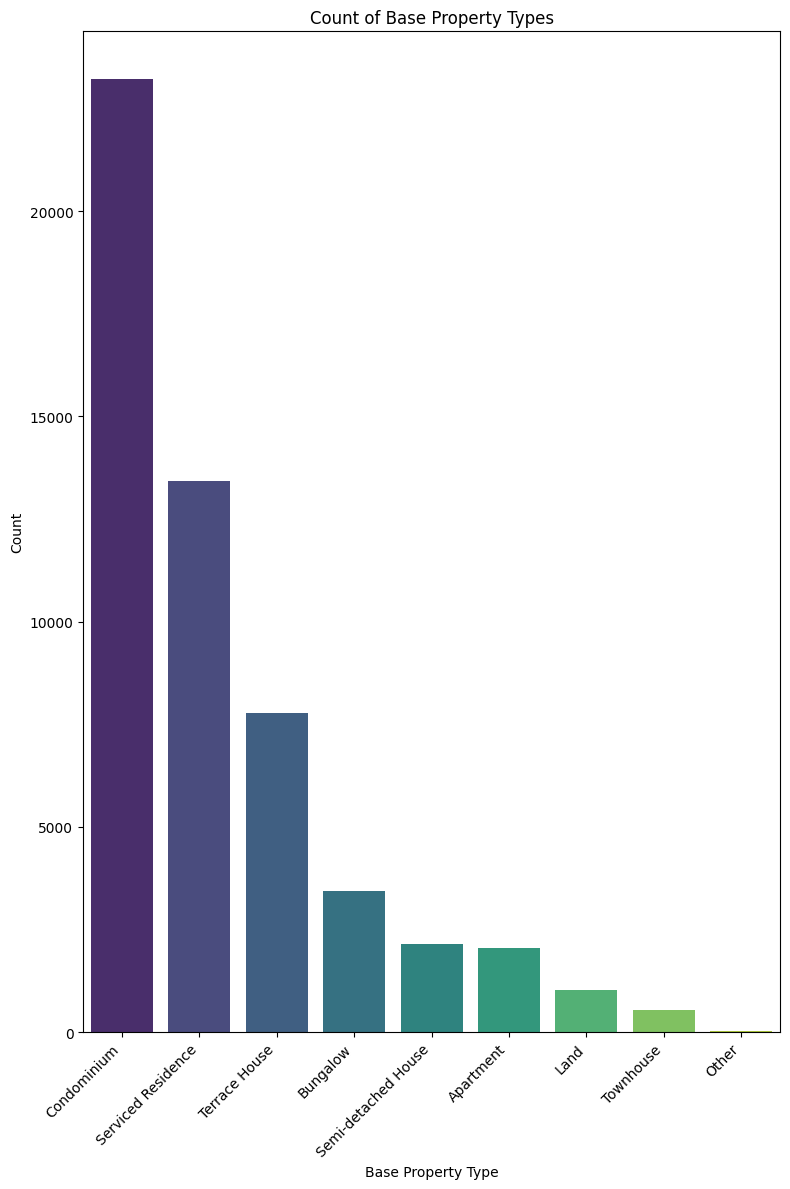

In [18]:
# Count of each base property type
plt.figure(figsize=(8,12))
sns.countplot(data = df,x= 'Property Type', order = df['Property Type'].value_counts().index,palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Base Property Types')
plt.xlabel('Base Property Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [19]:
df.head(10)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Area
0,"KLCC, Kuala Lumpur",1250000.0,2,3,2,Serviced Residence,1335.0,Fully Furnished,KLCC
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7,0,Bungalow,6900.0,Partly Furnished,Damansara Heights
2,"Dutamas, Kuala Lumpur",1030000.0,3,4,2,Condominium,1875.0,Partly Furnished,Dutamas
4,"Bukit Jalil, Kuala Lumpur",900000.0,4,3,2,Condominium,1513.0,Partly Furnished,Bukit Jalil
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4,5,4,Bungalow,7200.0,Partly Furnished,Taman Tun Dr Ismail
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,4,4,Semi-detached House,3600.0,Partly Furnished,Taman Tun Dr Ismail
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000.0,4,4,3,Terrace House,75.0,Partly Furnished,Taman Tun Dr Ismail
9,"Sri Petaling, Kuala Lumpur",385000.0,3,2,1,Apartment,904.0,Partly Furnished,Sri Petaling
11,"Taman Tun Dr Ismail, Kuala Lumpur",1680000.0,4,3,0,Terrace House,80.0,Partly Furnished,Taman Tun Dr Ismail
12,"Taman Tun Dr Ismail, Kuala Lumpur",1700000.0,3,3,0,Terrace House,1900.0,Partly Furnished,Taman Tun Dr Ismail


### FEATURE ENGINEERING & EXPLORATORY DATA ANALYSIS (EDA)

checking the 'price column'

In [20]:
# discription of the 'Price' column
df['Price'].describe().apply(lambda x: f"{x:,.2f}")

count           53,635.00
mean         2,091,946.86
std         13,840,138.45
min                 10.00
25%            580,000.00
50%            990,000.00
75%          1,996,400.00
max      1,980,000,000.00
Name: Price, dtype: object

The mean price is around 2 million, but the standard deviation is extremely large (~13.8 million), indicating high variance in property prices.
The maximum price is almost 2 billion, which is might be data error because in KL a property price does not reach billion. The range of House price in kl is "RM 25,000"  to "30,000,000" we will consider any value out of this range as error



In [21]:
#Remove extremely low or invalid prices
## Keep prices between RM 100000 and RM 60000

df2 = df[(df['Price'] >= 100000) & (df['Price'] <= 6000000)]
df2.shape


(50500, 9)

In [22]:
#check skew
df2['Price'].skew()

1.6860889378339283

A skewness value greater than 1 indicates a highly right-skewed distribution.

In our case, a skewness of 4.18 suggests that a large number of properties are priced on the lower end, while a small number are extremely expensive.

This level of skew can impact regression models that assume normally distributed target variables.

Text(0.5, 0, 'Price(RM)')

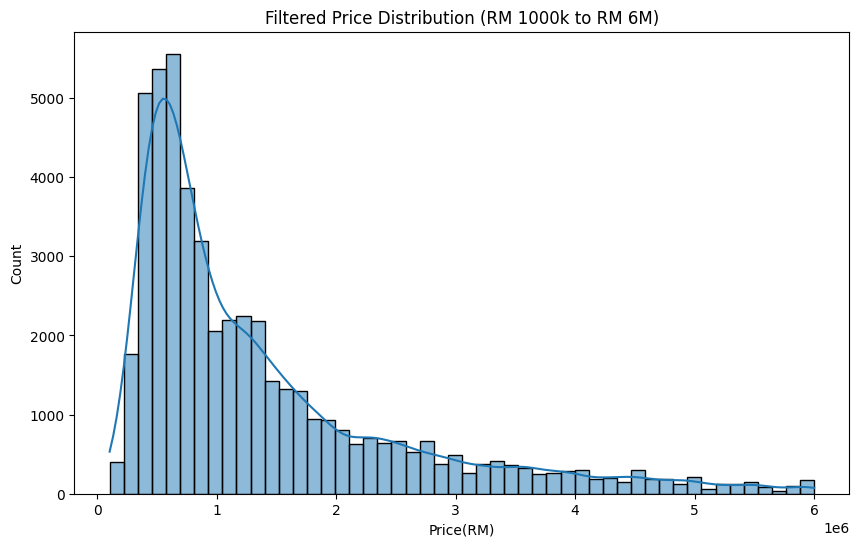

In [23]:
#distribution of the filtered price to see how it is skewed
plt.figure(figsize=(10,6))
sns.histplot(df2['Price'],bins = 50, kde = True)
plt.title("Filtered Price Distribution (RM 1000k to RM 6M)")
plt.xlabel("Price(RM)")

In [24]:
#log transformation price to handle skewness
df2.loc[:, 'Price'] = np.log1p(df2['Price'])
print(df2['Price'].skew()) 


0.29978528822040906


To reduce skewness in the Price column and stabilize variance, we applied a log transformation using np.log1p(). This technique is useful when data is heavily right-skewed, as it compresses the range of large values.

Text(0.5, 0, 'Price (RM)')

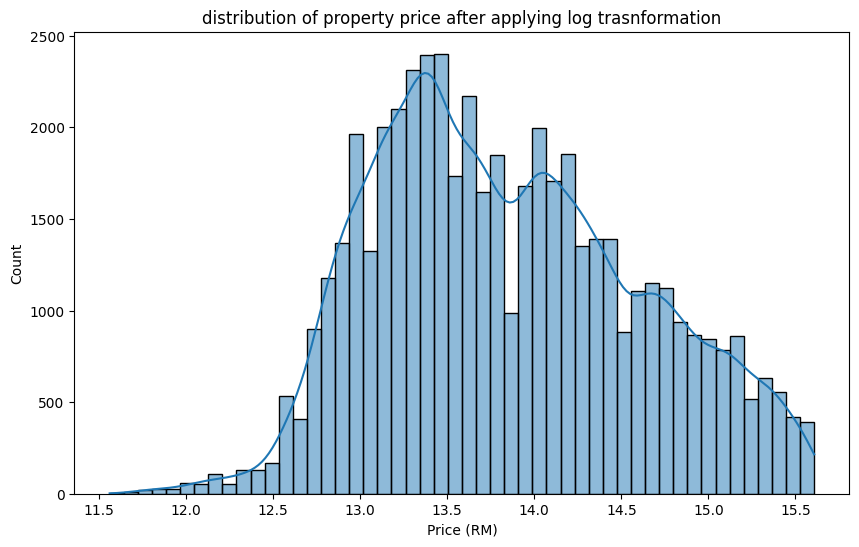

In [25]:
#viuslizing the price after transformation
plt.figure(figsize = (10,6))
sns.histplot(df2['Price'],bins = 50, kde = True)
plt.title('distribution of property price after applying log trasnformation')
plt.xlabel('Price (RM)') 

In [26]:
#checking the 'size' column for oulier
df2['Size'].describe().apply(lambda x: f"{x:,.2f}") 

count     50,500.00
mean       1,869.29
std        8,756.31
min            0.00
25%          869.00
50%        1,236.00
75%        1,879.00
max      820,000.00
Name: Size, dtype: object

The mean (2,532.56) is much higher than the median (1,259.00), indicating a right-skewed distribution.

The maximum value of 11,000,000 is unusually high and likely an outlier or a data entry error.

The minimum value is 0, which may also be invalid depending on the context (e.g., size should not be)

####  Filtering Outliers in House Size

In [27]:
#removing size = 0
df2 = df2[df2['Size'] > 0] 

In [28]:
# Filter the data to include properties with size between 400 and 10000
df3 = df2[(df['Size'] >= 400) & (df['Size'] <= 4000)]
df3.shape  


C:\Users\modou\AppData\Local\Temp\ipykernel_30020\299212595.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[(df['Size'] >= 400) & (df['Size'] <= 4000)]


(41180, 9)

To improve data quality and model performance, we filter the Size feature to remove unrealistic values.
Sizes below 400 square feet are likely to be studio apartments or invalid entries.
Sizes above 10,000 square feet are extremely rare and may represent commercial properties, mansions, or data errors.

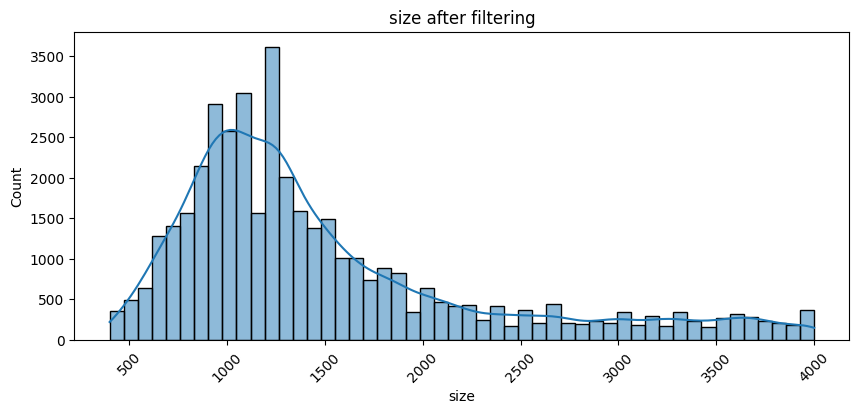

In [29]:
# visualizing to see how the size column is skew
plt.figure(figsize=(10, 4))
sns.histplot(df3['Size'],bins= 50,kde = True)
plt.xticks(rotation=45)
plt.title('size after filtering')
plt.xlabel('size')
plt.show() 


In [30]:
#appying log to reduce the outlier
df3['Size'] = np.log1p(df3['Size'])

C:\Users\modou\AppData\Local\Temp\ipykernel_30020\2082035097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Size'] = np.log1p(df3['Size'])


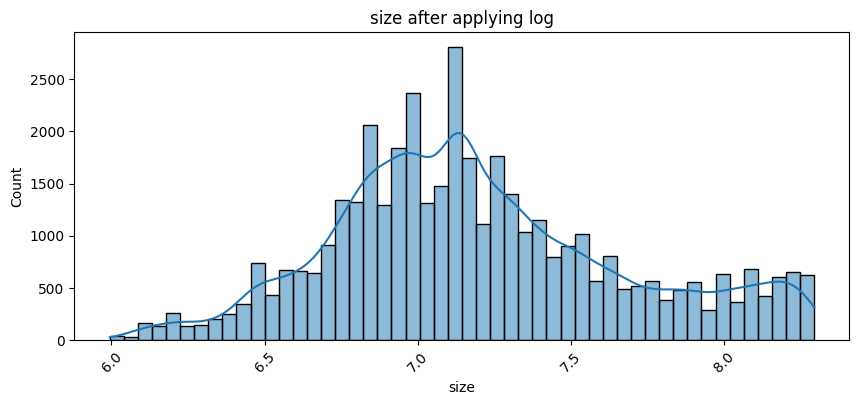

In [31]:
#after appllying log transformation
plt.figure(figsize=(10, 4))
sns.histplot(df3['Size'],bins= 50,kde = True)
plt.xticks(rotation=45)
plt.title('size after applying log')
plt.xlabel('size')
plt.show()

In [32]:
##checking the 'Bathroom' column for oulier
df3['Bathrooms'].describe().apply(lambda x: f"{x:,.2f}")

count    41,180.00
mean          2.64
std           1.23
min           1.00
25%           2.00
50%           2.00
75%           3.00
max          20.00
Name: Bathrooms, dtype: object

In [33]:
#checking 'rooms'
df3['Rooms'].describe().apply(lambda x: f"{x:,.2f}")

count    41,180.00
mean          2.92
std           0.96
min           1.00
25%           2.00
50%           3.00
75%           3.00
max          11.00
Name: Rooms, dtype: object

In [34]:
#checking the ''
df3['Car Parks'].describe().apply(lambda x: f"{x:,.2f}")

count    41,180.00
mean          1.27
std           1.03
min           0.00
25%           0.00
50%           1.00
75%           2.00
max          30.00
Name: Car Parks, dtype: object

To ensure a cleaner dataset and minimize the impact of outliers, we applied filters to retain only typical residential properties:

Bathrooms ≤ 7

Rooms ≤ 8

Car Parks ≤ 5

These thresholds were chosen based on summary statistics and domain knowledge of typical Malaysian residential property structures.

In [239]:
#removing the unsual in this columns
df4 = df3[
    (df['Bathrooms'] <= 7) &
    (df['Rooms'] <= 8) &
    (df['Car Parks'] <= 5)
]
df4.head()

C:\Users\modou\AppData\Local\Temp\ipykernel_30020\243437513.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Area
0,"KLCC, Kuala Lumpur",14.038655,2,3,2,Serviced Residence,7.197435,Fully Furnished,KLCC
2,"Dutamas, Kuala Lumpur",13.845070,3,4,2,Condominium,7.536897,Partly Furnished,Dutamas
4,"Bukit Jalil, Kuala Lumpur",13.710151,4,3,2,Condominium,7.322510,Partly Furnished,Bukit Jalil
7,"Taman Tun Dr Ismail, Kuala Lumpur",14.771022,5,4,4,Semi-detached House,8.188967,Partly Furnished,Taman Tun Dr Ismail
9,"Sri Petaling, Kuala Lumpur",12.861001,3,2,1,Apartment,6.807935,Partly Furnished,Sri Petaling


Check Correlation with Target (Price)

the features 'Size','Birthrooms' and 'Rooms' are the main features that affect the price

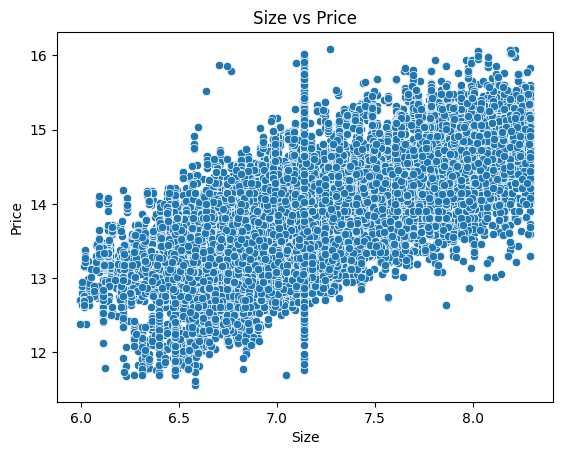

Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing', 'Area'],
      dtype='object')


In [240]:
# Size vs Price
sns.scatterplot(data=df4, x='Size', y='Price')
plt.title('Size vs Price')
plt.show()
print(df4.columns)

#### Boxplots for Categorical Features

#### ENCODING CATEGORIAL FEATURES

- **PropertyType_encoded**: Target encoding based on the average price for each property type.
- **Furnishing_encoded**: Ordinal encoding where 'Partly Furnished' = 0, 'Fully Furnished' = 1.
- **Area_encoded**: Target encoding using the average price for each area to capture regional price trends.

In [241]:
# Copy original dataframe
df5 = df4.copy()

# Encode Property Type using average Price (target encoding)
df5['PropertyType_encoded'] = df4['Property Type'].map(df4.groupby('Property Type')['Price'].mean())

# Encode Furnishing with ordinal values
furnish_map = {'Partly Furnished': 0, 'Fully Furnished': 1}
df5['Furnishing_encoded'] = df4['Furnishing'].map(furnish_map)

# Encode Area using average Price (target encoding)
df5['Area_encoded'] = df4['Area'].map(df4.groupby('Area')['Price'].mean())


Select Features and Target

In [38]:
df5.head() 

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Area,PropertyType_encoded,Furnishing_encoded,Area_encoded
0,"KLCC, Kuala Lumpur",14.038655,2,3,2,Serviced Residence,7.197435,Fully Furnished,KLCC,13.737085,1.0,14.390805
2,"Dutamas, Kuala Lumpur",13.845070,3,4,2,Condominium,7.536897,Partly Furnished,Dutamas,13.724164,0.0,13.716173
4,"Bukit Jalil, Kuala Lumpur",13.710151,4,3,2,Condominium,7.322510,Partly Furnished,Bukit Jalil,13.724164,0.0,13.503668
7,"Taman Tun Dr Ismail, Kuala Lumpur",14.771022,5,4,4,Semi-detached House,8.188967,Partly Furnished,Taman Tun Dr Ismail,14.805672,0.0,14.080678
9,"Sri Petaling, Kuala Lumpur",12.861001,3,2,1,Apartment,6.807935,Partly Furnished,Sri Petaling,12.676170,0.0,13.264637


## Feature Selection

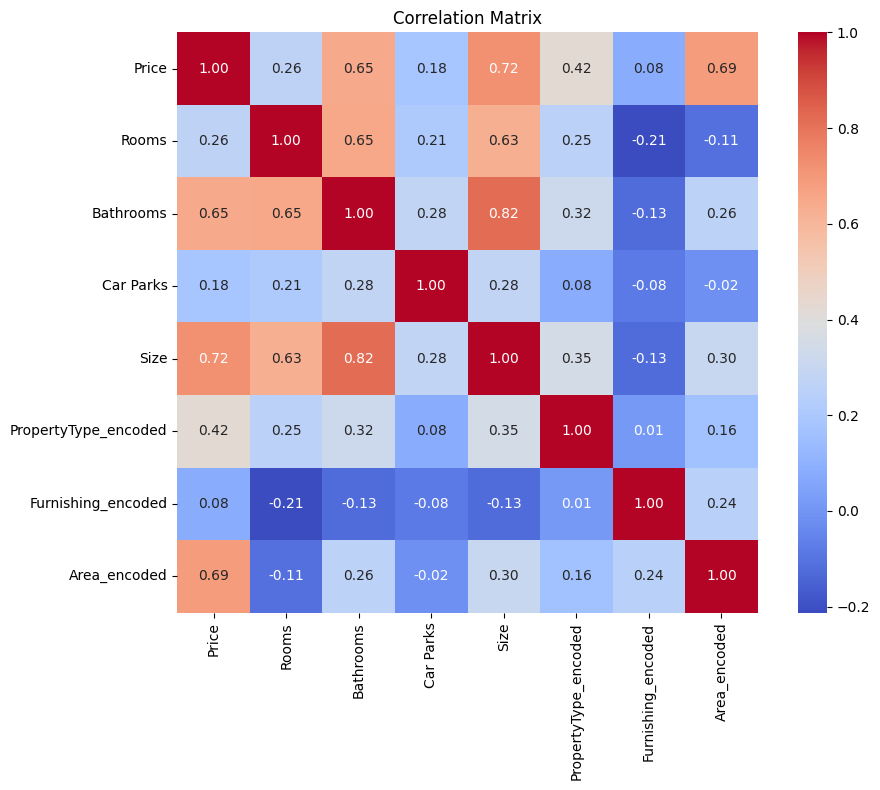

In [243]:
#selecting numwerix features
plt.figure(figsize=(10, 8))
numeric_feature = df5.select_dtypes(include = 'number')

#compute correlation
corr_matrix = numeric_feature.corr()

#plot

sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

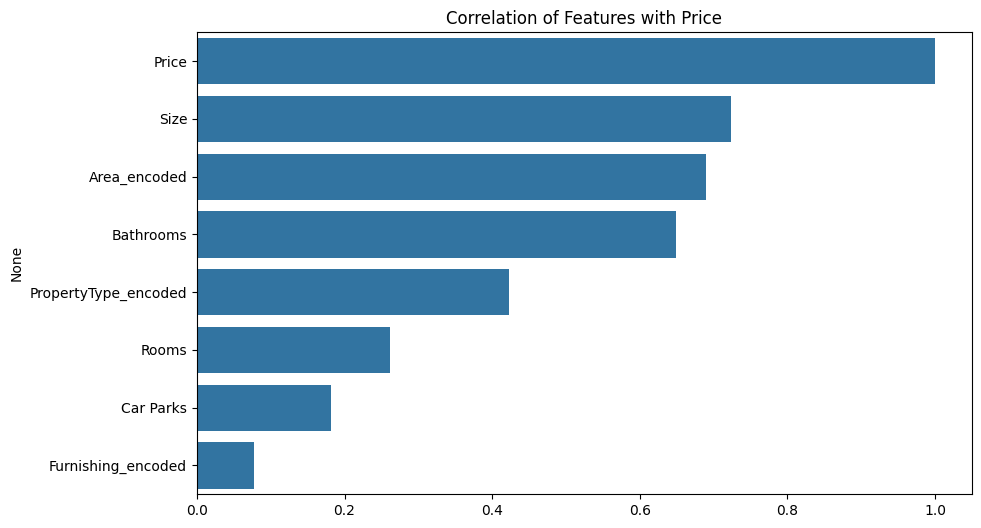

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Area,PropertyType_encoded,Furnishing_encoded,Area_encoded
0,"KLCC, Kuala Lumpur",14.038655,2,3,2,Serviced Residence,7.197435,Fully Furnished,KLCC,13.744235,1.0,14.419267
2,"Dutamas, Kuala Lumpur",13.845070,3,4,2,Condominium,7.536897,Partly Furnished,Dutamas,13.731205,0.0,13.716173
4,"Bukit Jalil, Kuala Lumpur",13.710151,4,3,2,Condominium,7.322510,Partly Furnished,Bukit Jalil,13.731205,0.0,13.504681
7,"Taman Tun Dr Ismail, Kuala Lumpur",14.771022,5,4,4,Semi-detached House,8.188967,Partly Furnished,Taman Tun Dr Ismail,14.806771,0.0,14.080678
9,"Sri Petaling, Kuala Lumpur",12.861001,3,2,1,Apartment,6.807935,Partly Furnished,Sri Petaling,12.676170,0.0,13.264637


In [246]:
correlation = df5.corr(numeric_only=True)['Price'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10,6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation of Features with Price')
plt.show()
df5.head()

## SUPERVISED LEARNING(Price prediction)

### Data Splitting

In [247]:
# Define features (X) and target (y)
# Dropping columns not needed or already encoded
x = df5.drop(['Location', 'Price', 'Furnishing', 'Property Type', 'Area', 'Furnishing_encoded'], axis=1)
y = df5['Price']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check shapes of train/test sets
print(X_train.shape)
print(X_test.shape)


(32944, 6)
(8236, 6)


In [1294]:
x.columns

Index(['Rooms', 'Bathrooms', 'Car Parks', 'Size', 'PropertyType_encoded',
       'Area_encoded'],
      dtype='object')

### ✂️ Feature Selection and Data Split

- Dropped columns:
  - `Location`, `Price`: not used as features
  - `Furnishing`, `Property Type`, `Area`: original versions, replaced by encoded columns
  - `Furnishing_encoded`: dropped due to low correlation with price

- Used `train_test_split` to split data:
  - 80% for training, 20% for testing
  - `random_state=42` ensures reproducibility


 Feature Scaling 

In [248]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled= scaler.fit_transform(X_train)  
X_test_scaled = scaler.fit_transform(X_test)

LINEAR MODEL

In [249]:
# Initialize the Linear Regression model
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
print("Linear Regression R² score:", r2_score(y_test, y_pred))
print("Linear Regression MAE: ",mean_absolute_error(y_test, y_pred))
print("Linear Regression RMSE:", root_mean_squared_error(y_test, y_pred))
print("Training score (R²):", model.score(X_train_scaled, y_train))

Linear Regression R² score: 0.8025414170931152
Linear Regression MAE:  0.24007030840089943
Linear Regression RMSE: 0.31450884694415426
Training score (R²): 0.8064997871716554


USING THE  Random Forest Regressor

In [250]:

rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE: ",mean_absolute_error(y_test, y_pred))
print("Random Forest RMSE:",root_mean_squared_error(y_test, y_pred))
print("the train score",rf.score(X_train,y_train))


Random Forest R^2: 0.9371964933052244
Random Forest MAE:  0.24007030840089943
Random Forest RMSE: 0.31450884694415426
the train score 0.9835456163771659


Gradient Boosting Regressor

In [251]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 42)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting R^2:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting MAE: ",mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", root_mean_squared_error(y_test, y_pred))
print("the train score",gb.score(X_train,y_train))



Gradient Boosting R^2: 0.8603248386545173
Gradient Boosting MAE:  0.19867426075757144
Gradient Boosting RMSE: 0.31450884694415426
the train score 0.8641270959425063


#### XGBoost

In [252]:
# 1. Import the model
from xgboost import XGBRegressor

# 2. Initialize the model (you can tweak hyperparameters later)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# 3. Train the model
xgb_model.fit(X_train, y_train)

# 4. Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R^2:", r2_score(y_test, y_pred_xgb))
print("XGBoost MAE: ", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("Training score:", xgb_model.score(X_train, y_train))


XGBoost R^2: 0.901835693350012
XGBoost MAE:  0.16233459304321393
XGBoost RMSE: 0.22175410098873874
Training score: 0.9131484916857391


#### VISULIZATION(COMPARING MODELS)

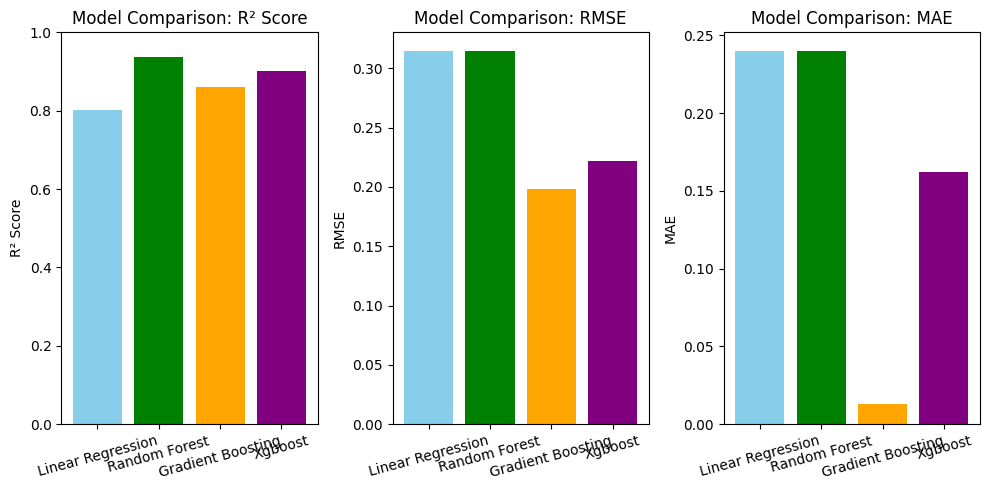

In [253]:
# Model performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Xgboost']
r2_scores = [0.8025, 0.9371,0.8603,0.9018]
rmses = [0.3145,0.3145,0.1986,0.2217]
MAE = [0.2400,0.2400,0.0133,0.1623]

# Plotting R² Score
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(models, r2_scores, color=['skyblue', 'green', 'orange', 'purple'])
plt.title('Model Comparison: R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)

# Plotting RMSE
plt.subplot(1, 3, 2)
plt.bar(models, rmses, color=['skyblue', 'green', 'orange', 'purple'])
plt.title('Model Comparison: RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=15)

# Plotting MAE
plt.subplot(1, 3, 3)
plt.bar(models, MAE, color=['skyblue', 'green', 'orange', 'purple'])
plt.title('Model Comparison: MAE')
plt.ylabel('MAE')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


#### Best Performing Model: XGBoost
###### Lowest MAE (most precise on average)

###### Lowest RMSE (better at avoiding large errors)

###### Strong R² on test and train (good fit without major overfitting)

# UNSUPERVISED(Market Segmentation)

In [254]:
print("Final dataframe shape for clustering:", df5.columns)

Final dataframe shape for clustering: Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing', 'Area', 'PropertyType_encoded',
       'Furnishing_encoded', 'Area_encoded'],
      dtype='object')


## 1. K-Means Clustering

In [255]:
#droping Price,Location,size
segmentation_data  = df5.drop(['Location', 'Furnishing', 'Furnishing_encoded','PropertyType_encoded','Area_encoded'], axis=1)
df_clustered = segmentation_data.copy()


#### scaling  and ecoding the unsupervised data

In [256]:
# 1. One-hot encode categorical features
# This part remains the same as it's already correctly handled
cat_features = ['Property Type', 'Area']
cat_encoded_df = pd.get_dummies(df5[cat_features], drop_first=True)

# 2. Select and scale ALL relevant numerical features for clustering
# This is the main change: include 'Rooms', 'Bathrooms', and 'Car Parks' in the scaling
num_features_for_clustering = ['Size', 'Price', 'Rooms', 'Bathrooms', 'Car Parks']

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df5[num_features_for_clustering])
scaled_df = pd.DataFrame(scaled_data, columns=num_features_for_clustering, index=df5.index) # Keep original index for merging

# 3. Combine everything for segmentation
# Ensure indices align correctly during concatenation
segmentation_data = pd.concat([scaled_df, cat_encoded_df], axis=1)

# --- End of Correction ---

# You can now proceed with your clustering algorithms (K-Means, GMM)
# using 'segmentation_data'
print("Shape of segmentation_data:", segmentation_data.shape)
print("\nFirst 5 rows of segmentation_data (after scaling all numerical features):")
print(segmentation_data.head())

Shape of segmentation_data: (41180, 62)

First 5 rows of segmentation_data (after scaling all numerical features):
       Size     Price  Rooms  Bathrooms  Car Parks  Property Type_Bungalow  \
0  0.094074  0.393594   -1.0        1.0        0.5                   False   
2  0.639323  0.207516    0.0        2.0        0.5                   False   
4  0.294971  0.077829    1.0        1.0        0.5                   False   
7  1.686689  1.097562    2.0        2.0        1.5                   False   
9 -0.531549 -0.738393    0.0        0.0        0.0                   False   

   Property Type_Condominium  Property Type_Land  Property Type_Other  \
0                      False               False                False   
2                       True               False                False   
4                       True               False                False   
7                      False               False                False   
9                      False               False   

#### Using elbow to choose K

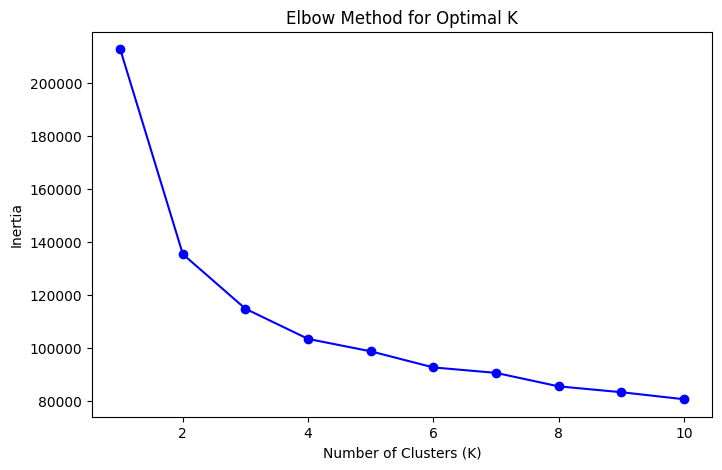

In [257]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(segmentation_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [258]:
# Suppose elbow suggests K=2
kmeans = KMeans(n_clusters=2, random_state=42)
k_clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels to the original DataFrame
segmentation_data['k_Cluster'] = k_clusters


In [259]:
# View average values in each cluster
segmentation_data.groupby('k_Cluster')[['Rooms', 'Bathrooms', 'Car Parks', 'Size','Price']].mean()

,Rooms,Bathrooms,Car Parks,Size,Price
k_Cluster,,,,,
0,0.742427,2.175502,0.313920,0.997522,0.785343
1,-0.437552,-0.013433,0.049153,-0.287279,-0.193602


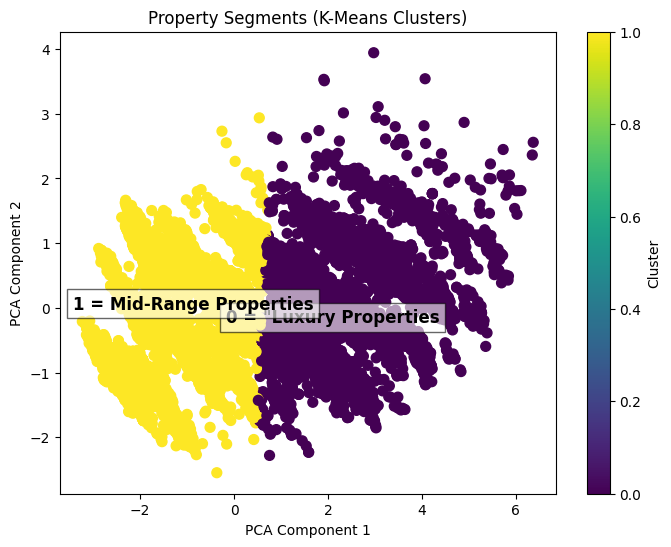

In [260]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=k_clusters, cmap='viridis', s=50)
plt.title('Property Segments (K-Means Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

cluster_labels = {
    0: '"Luxury Properties',
    1: 'Mid-Range Properties',
    # Add more if you have more clusters
}

# Annotate each cluster center with the custom label
for cluster_id, label in cluster_labels.items():
    # Get the mean position of each cluster
    cluster_points = pca_data[k_clusters == cluster_id]
    center_x, center_y = cluster_points.mean(axis=0)
    plt.text(center_x, center_y, f"{cluster_id} = {label}", fontsize=12, weight='bold',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

plt.show()


In [262]:
#analyzing each segment
segmentation_data.groupby('k_Cluster')[['Price', 'Size', 'Rooms', 'Bathrooms']].describe()


Price                                                             \
             count      mean       std       min       25%       50%      75%   
k_Cluster                                                                       
0          12148.0  0.785343  0.508023 -0.952883  0.431294  0.759985  1.14446   
1          29032.0 -0.193602  0.519842 -1.987286 -0.550738 -0.249877  0.12980   

                        Size            ... Rooms      Bathrooms            \
                max    count      mean  ...   75%  max     count      mean   
k_Cluster                               ...                                  
0          2.363121  12148.0  0.997522  ...   1.0  5.0   12148.0  2.175502   
1          2.269523  29032.0 -0.287279  ...   0.0  3.0   29032.0 -0.013433   

                                              
                std  min  25%  50%  75%  max  
k_Cluster                                     
0          0.982343 -1.0  1.0  2.0  3.0  5.0  
1          0.534013 -1.0  0.0  0.0  0.0  2.0  

[2 rows x 32 columns]

#### Affordable mean price -----> RM 606,000
#### Expensive mean price -----> RM 1,889,500
#### Affordable mean size -----> 1,015 sq ft
#### Expensive mean size-----> 2,150 sq ft

In [263]:
# --- Step 2: Analyze Numerical Features per Cluster ---
df_clustered['Cluster'] =  k_clusters
print("--- Average Numerical Features per Cluster ---")
numerical_summary = df_clustered.groupby('Cluster')[['Rooms', 'Bathrooms', 'Car Parks', 'Size','Price']].mean()
print(numerical_summary)
print("\n")

# --- Step 3: Analyze Categorical Features (Area and Property Type) per Cluster ---
print("--- Top Property Types and Areas per Cluster ---")
# Get unique cluster labels
unique_clusters = df_clustered['Cluster'].unique()
unique_clusters.sort() # Sort for consistent output

for cluster_id in unique_clusters:
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]

    # Property Type distribution
    print("  Top 5 Property Types:")
    prop_type_counts = cluster_data['Property Type'].value_counts(normalize=True).head(5)
    if not prop_type_counts.empty:
        print(prop_type_counts.apply(lambda x: f"{x:.2%}")) # Format as percentage
    else:
        print("    (No data for this property type in this cluster)")

    # Area distribution
    print("\n  Top 5 Areas:")
    area_counts = cluster_data['Area'].value_counts(normalize=True).head(5)
    if not area_counts.empty:
        print(area_counts.apply(lambda x: f"{x:.2%}")) # Format as percentage
    else:
        print("    (No data for this area in this cluster)")

--- Average Numerical Features per Cluster ---
            Rooms  Bathrooms  Car Parks      Size      Price
Cluster                                                     
0        3.742427   4.175502   1.627840  7.759905  14.446208
1        2.562448   1.986567   1.098305  6.960013  13.427770


--- Top Property Types and Areas per Cluster ---

--- Cluster 0 ---
  Top 5 Property Types:
Property Type
Condominium            61.59%
Terrace House          15.62%
Serviced Residence     12.71%
Semi-detached House     6.82%
Townhouse               1.48%
Name: proportion, dtype: object

  Top 5 Areas:
Area
Mont Kiara                           25.39%
KLCC                                 14.32%
Desa ParkCity                         4.63%
Bukit Jalil                           4.46%
Jalan Klang Lama (Old Klang Road)     3.70%
Name: proportion, dtype: object

--- Cluster 1 ---
  Top 5 Property Types:
Property Type
Condominium           49.85%
Serviced Residence    39.44%
Apartment              6.76%
Te

## Model Evaluation

In [264]:
score_k2 = silhouette_score(segmentation_data, k_clusters)
print(f"Silhouette Score for k=2: {score_k2:.3f}")


Silhouette Score for k=2: 0.363
